In [1]:
import numpy as np

In [2]:
############ Problem 3 ############

def checkCodewords(H,x):
    output = H.dot(x.T)
    output %= 2
    res = True
    for i in range(len(output)):
        if output[i] == 1:
            res = False

    return res, output

H = np.array([[1,0,0,0,1,1,1,0,0,0,1,1,1,0,1], [0,1,0,0,1,0,0,1,1,0,1,1,0,1,1], [0,0,1,0,0,1,0,1,0,1,1,0,1,1,1], [0,0,0,1,0,0,1,0,1,1,0,1,1,1,1]], dtype = int)
x_1 = np.array([1,1,1,1,1,1,1,0,0,1,0,0,0,0,0], dtype = int)
x_2 = np.array([1,0,0,1,1,0,0,1,0,1,0,0,0,0,0], dtype = int)
x_3 = np.array([1,0,0,0,1,0,0,0,0,0,0,0,0,0,1], dtype = int)

res, output = checkCodewords(H,x_3)
res

False

In [3]:
############ Problem 4 ############

def generateE_less_than_oneBit(n):
    res = np.zeros((n,n+1), dtype = int)
    for i in range(n):
        res[i][i] = 1

    return res

def buildTable(H,E):
    S = H.dot(E)
    return S

# take x_1 for example
n_ex = len(x_1)
E_ex = generateE_less_than_oneBit(n_ex)
S_ex = buildTable(H,E_ex)
S_ex

array([[1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0],
       [0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0],
       [0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0],
       [0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0]])

In [4]:
# This function permutes all error vectors with n bits into a single matrix E
def generateE_with_bits(H,bits):
    nums = np.zeros(H.shape[1], dtype=int)
    nums[:bits] = 1
    E = [[]]
    for num in nums:
        E = [sub[:i] + [num] + sub[i:] for sub in E for i in range((sub+[num]).index(num) + 1)]

    return np.array(E, dtype = int).T # every column is one error vector with n bits error

generateE_with_bits(H,1)

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

In [11]:
############ Problem 6 ############

# s = Hr = Hx + He, also, Hx = 0
# so, s = He = Hr. This means the goal of channelDecode is to find a single column
# in E(which is e) whose dot product with H equals to s and has least l1-norm, and
# then output decoded signal x.

def channelDecode(H,r):
    # if r is a valid code, decoded signal x = r and e = zero vector
    res, output = checkCodewords(H,r)
    if(res):
        print('The received signal is a valid code: ', r)
        return r

    n = len(r)
    E = generateE_less_than_oneBit(n)
    S = buildTable(H,E) # every column in S is a potential syndrome corresponding to one specific e
    s = H.dot(r)
    s %= 2
    target_e = np.zeros(n)

    # S = HX + HE = He, so the col in E corresponds to the same col in S
    for i in range(n+1):
        if(np.array_equal(S[:,i], s)):
            target_e = E[:,i]
            break 
        
    x = r - target_e # x = r - e
    x %= 2
    print('The received signal can be corrected: ', x)
    print('The error vector is: ', target_e)

    return x

r = np.array([1,1,1,1,1,0,0,0,0,1,0,0,0,0,0], dtype = int)
x = channelDecode(H,r)

The received signal is a valid code:  [1 1 1 1 1 0 0 0 0 1 0 0 0 0 0]


In [12]:
# change r: convert the last element as example

r_1 = np.array([0,1,1,1,1,0,0,0,0,1,0,0,0,0,0], dtype = int)
x_1 = channelDecode(H,r_1)

The received signal can be corrected:  [1 1 1 1 1 0 0 0 0 1 0 0 0 0 0]
The error vector is:  [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [7]:
def decoded_without_errors(H, x, error_bits):
    E = generateE_with_bits(H,error_bits)
    R = np.array([x]).T + E
    R %= 2
    count = 0

    for col in range(R.shape[1]):
        x_decode = channelDecode(H,R[:,col])
        if(np.array_equal(x_decode,x)):
            count += 1

    print("Successfully decoded ", count, " times")

x = np.array([1,1,1,1,1,0,0,0,0,1,0,0,0,0,0])
error_bits = 1

decoded_without_errors(H, x, error_bits)



Successfully decoded  15  times


In [8]:
error_bits = 2
decoded_without_errors(H, x, error_bits)

Successfully decoded  0  times


In [9]:
error_bits = 3
decoded_without_errors(H, x, error_bits)

Successfully decoded  0  times


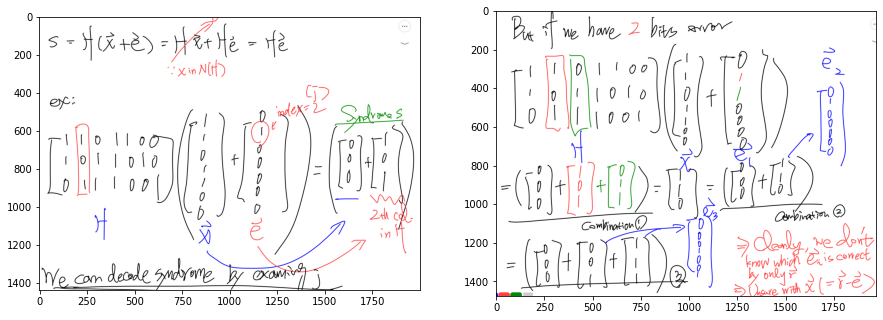

In [10]:
# Summary: error vector with one bit error can be detected by checking the syndrome.
# for example, if s = [0,1,0] == S(i), then we can imply there is "one" column cj in H can be 
# extracted by one-bit error vector with 1 in the same index j, as figure shown below.
# If we can estimate this j, decoding can be finished. 
# But, when we get more bit errors in e, one or more of the other syndrome bits are `0' indicating multiple errors, 
# which means no correction is possible. (too many possible e for single x)

from matplotlib import pyplot as plt

f = plt.figure(figsize=(15,15))
f.add_subplot(121)
plt.imshow(plt.imread('one_bit.jpg'))
f.add_subplot(122)
plt.imshow(plt.imread('bits.jpg'))